# Example Code for Time-Series Lecture, ThAIMed 2024
> L. Barrett, Monday 26th, 2024

## Demo 1

Install MNE for EEG Processing

In [ ]:
# Install MNE
!pip install mne

In [1]:
# Import necessary libraries

import numpy as np                              # for data manipulation
import matplotlib.pyplot as plt                 # for data visualisation
import mne                                      # for EEG data handling
from statsmodels.tsa.ar_model import AutoReg    # for auto-regressive modelling
import tensorflow as tf                         # for deep learning

In [2]:
def preprocess_eeg(raw):
    """
    Preprocess the EEG data: filter and remove bad channels.
    
    Parameters:
    raw (mne.io.Raw): MNE Raw object containing EEG data
    
    Returns:
    mne.io.Raw: Preprocessed MNE Raw object
    """
    # Apply a bandpass filter
    raw.filter(l_freq=1, h_freq=40)
    
    # Detect and interpolate bad channels
    raw.interpolate_bads(reset_bads=True)
    
    return raw

In [3]:
def plot_eeg_channels(raw, n_channels=5, duration=10, start=0):
    """
    Plot the first n_channels of the EEG data.
    
    Parameters:
    raw (mne.io.Raw): MNE Raw object containing EEG data
    n_channels (int): Number of channels to plot
    duration (float): Duration of the data to plot in seconds
    start (float): Start time for plotting in seconds
    """
    data, times = raw[:n_channels, int(start*raw.info['sfreq']):int((start+duration)*raw.info['sfreq'])]
    
    fig, axs = plt.subplots(n_channels, 1, figsize=(15, 3*n_channels), sharex=True)
    for i, (ax, ch_name) in enumerate(zip(axs, raw.ch_names[:n_channels])):
        ax.plot(times, data[i])
        ax.set_title(ch_name)
        ax.set_ylabel('µV')
    
    axs[-1].set_xlabel('Time (s)')
    plt.tight_layout()
    plt.show()

In [4]:
# Additional visualisation functions
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.time_frequency import tfr_morlet
def plot_psd(raw, fmin=0, fmax=50, n_fft=2048, n_overlap=0, picks=None):
    """
    Plot Power Spectral Density for the EEG data.
    
    Parameters:
    raw (mne.io.Raw): MNE Raw object containing EEG data
    fmin (float): Minimum frequency to include
    fmax (float): Maximum frequency to include
    n_fft (int): Number of points in FFT
    n_overlap (int): Number of points to overlap between segments
    picks (list or None): List of channels to include, or None for all channels
    """
    fig = raw.plot_psd(fmin=fmin, fmax=fmax, n_fft=n_fft, n_overlap=n_overlap, 
                       picks=picks, show=False)
    plt.title('Power Spectral Density')
    plt.show()

def reduce_channels(raw, channel_list):
    """
    Reduce the raw data to include only the specified channels.
    
    Parameters:
    raw (mne.io.Raw): MNE Raw object containing EEG data
    channel_list (list): List of channel names to keep
    
    Returns:
    mne.io.Raw: New Raw object with only the specified channels
    """
    # Check which channels from the list are present in the raw data
    channels_to_keep = [ch for ch in channel_list if ch in raw.ch_names]
    
    # If no channels from the list are present, raise an error
    if not channels_to_keep:
        raise ValueError("None of the specified channels are present in the raw data.")
    
    # Create a new Raw object with only the specified channels
    raw_reduced = raw.copy().pick_channels(channels_to_keep)
    
    print(f"Reduced raw data from {len(raw.ch_names)} to {len(raw_reduced.ch_names)} channels.")
    return raw_reduced

channels_to_keep = [
        'EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE',
        'EEG A1-LE', 'EEG A2-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE',
        'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE',
        'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE', 'EEG OZ-LE'
    ]

In [5]:
# Import example EEG data
file_path = '../data/aaaaaajy_s001_t000.edf' # Replace `file_path` by your data path
raw = mne.io.read_raw_edf(file_path, preload=True)

Extracting EDF parameters from /Users/liambarrett/Library/CloudStorage/OneDrive-UniversityCollegeLondon/ThAI-Med/time_series/data/aaaaaajy_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 437499  =      0.000 ...  1749.996 secs...


In [6]:
# Print information about the imported data
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE, EEG C3-LE, EEG ...
 chs: 33 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2003-01-01 00:00:00 UTC
 nchan: 33
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Reduced raw data from 33 to 22 channels.


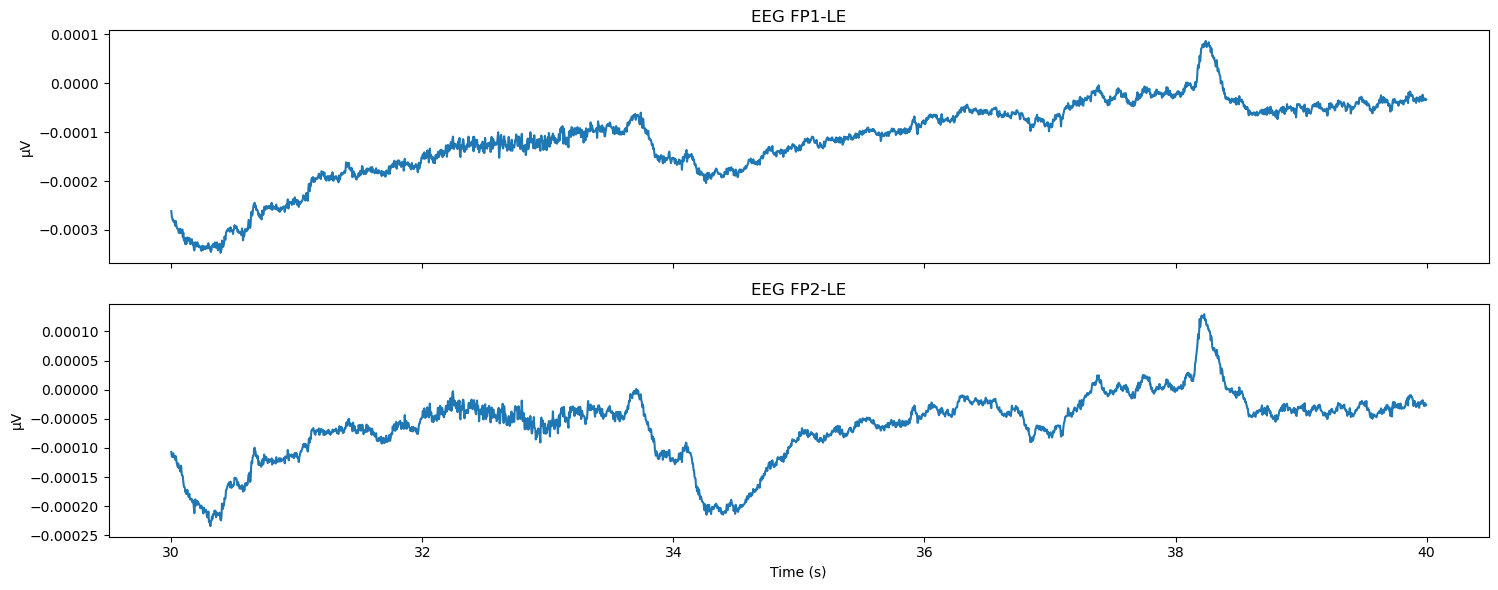

In [7]:
raw_reduced = reduce_channels(raw, channels_to_keep)
# Plot the first 2 channels of the preprocessed data
plot_eeg_channels(raw_reduced, n_channels=2, duration=10, start=30)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/var/folders/4l/_d6zvn5n5c73fxhj1cgbb6g80000gn/T/ipykernel_89683/4083990394.py:18: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = raw.plot_psd(fmin=fmin, fmax=fmax, n_fft=n_fft, n_overlap=n_overlap,


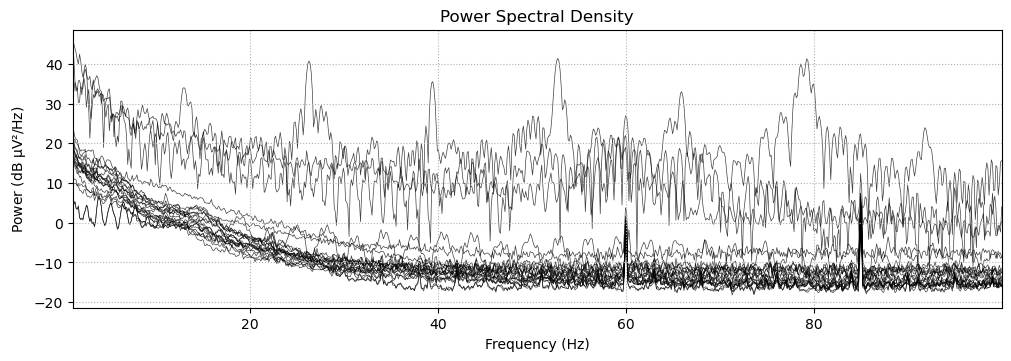

In [8]:
plot_psd(raw_reduced, fmin=1, fmax=100)

In [9]:
# Preprocess the data
raw_preprocessed = preprocess_eeg(raw)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 s)

Setting channel interpolation method to {'eeg': 'spline'}.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
/var/folders/4l/_d6zvn5n5c73fxhj1cgbb6g80000gn/T/ipykernel_89683/763662594.py:15: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw.interpolate_bads(reset_bads=True)


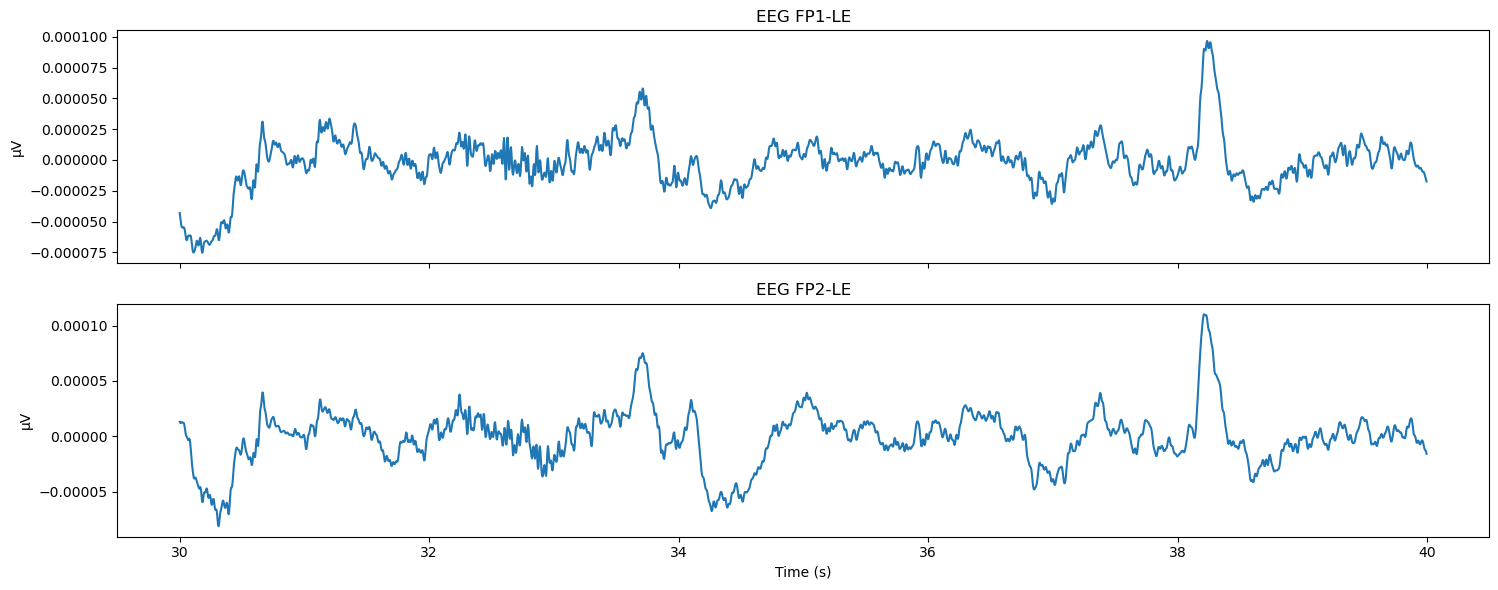

In [10]:
# Plot the first 2 channels of the preprocessed data
plot_eeg_channels(raw_preprocessed, n_channels=2, duration=10, start=30)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/var/folders/4l/_d6zvn5n5c73fxhj1cgbb6g80000gn/T/ipykernel_89683/4083990394.py:18: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = raw.plot_psd(fmin=fmin, fmax=fmax, n_fft=n_fft, n_overlap=n_overlap,


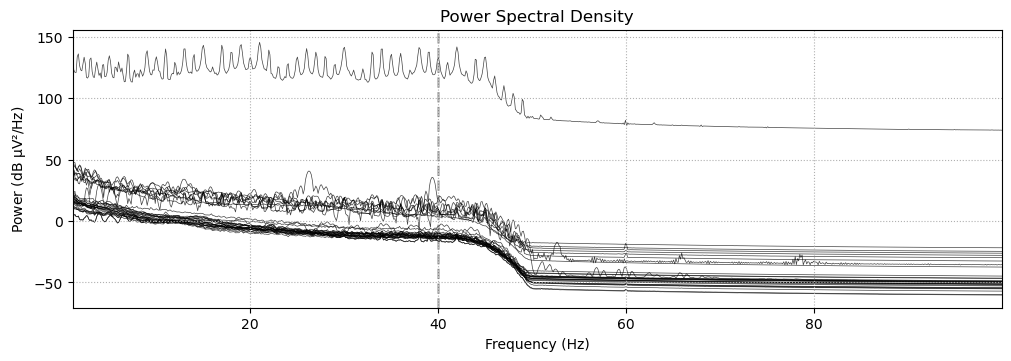

In [11]:
plot_psd(raw_preprocessed, fmin=1, fmax=100)

## Demo 2

In [11]:
# Functions for demo 2
import tensorflow as tf
import pickle
import os

def save_rnn_model(model, filepath):
    """
    Save a TensorFlow/Keras RNN model.

    Parameters:
    model (tf.keras.Model): The trained RNN model to save
    filepath (str): Path where the model should be saved
    """
    try:
        model.save(filepath)
        print(f"RNN model saved successfully to {filepath}")
    except Exception as e:
        print(f"Error saving RNN model: {e}")

def save_ar_model(model, filepath):
    """
    Save an Autoregressive model using pickle.

    Parameters:
    model: The trained AR model to save
    filepath (str): Path where the model should be saved
    """
    try:
        with open(filepath, 'wb') as f:
            pickle.dump(model, f)
        print(f"AR model saved successfully to {filepath}")
    except Exception as e:
        print(f"Error saving AR model: {e}")

def load_rnn_model(filepath):
    """
    Load a saved TensorFlow/Keras RNN model.

    Parameters:
    filepath (str): Path to the saved model

    Returns:
    tf.keras.Model: The loaded RNN model
    """
    try:
        model = tf.keras.models.load_model(filepath)
        print(f"RNN model loaded successfully from {filepath}")
        return model
    except Exception as e:
        print(f"Error loading RNN model: {e}")
        return None

def load_ar_model(filepath):
    """
    Load a saved Autoregressive model.

    Parameters:
    filepath (str): Path to the saved model

    Returns:
    The loaded AR model
    """
    try:
        with open(filepath, 'rb') as f:
            model = pickle.load(f)
        print(f"AR model loaded successfully from {filepath}")
        return model
    except Exception as e:
        print(f"Error loading AR model: {e}")
        return None
    
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Function to get middle half of data
def get_middle_half(data):
    start = len(data) // 4
    end = 3 * len(data) // 4
    return data[start:end]

### AR Model

In [13]:
# Select a single channel for modeling
channel_name = 'EEG CZ-LE'  # Replace with an actual channel name from your data
channel_data = raw_preprocessed.get_data(picks=channel_name).flatten()

# Split the data into training and testing sets
train_size = int(len(channel_data) * 0.8)
train_data = channel_data[:train_size]
test_data = channel_data[train_size:]

In [24]:
# Autoregressive Model
def fit_ar_model(data, order= 3 * 250.0):
    model = AutoReg(data, lags=order)
    model_fit = model.fit()
    return model_fit

def forecast_ar(model_fit, steps):
    return model_fit.forecast(steps=steps)

# Fit AR model and make predictions
ar_model = fit_ar_model(train_data)
ar_predictions = forecast_ar(ar_model, steps=len(test_data))

In [ ]:
# Plot AR results for a 3-second period
sampling_rate = 250  # Hz
duration = 3  # seconds
num_samples = duration * sampling_rate

# Create time array for 3 seconds
time = np.arange(num_samples) / sampling_rate

# Select a 3-second slice of data
start_index = 0  # You can change this to start at a different point
true_slice = test_data[start_index:start_index+num_samples]
pred_slice = ar_predictions[start_index:start_index+num_samples]

plt.figure(figsize=(12, 6))
plt.plot(time, true_slice, label='Actual', linewidth=2)
plt.plot(time, pred_slice, label='AR Predictions', linewidth=2)
plt.legend()
plt.title(f'Autoregressive Model Predictions for Fz (3-second period)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim(0, 3)  # Ensure x-axis spans exactly 3 seconds
plt.grid(True)

# Add vertical lines every 0.5 seconds for better readability
for t in np.arange(0.5, 3.5, 0.5):
    plt.axvline(x=t, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [112]:
# save AR model
save_ar_model(ar_model, '../models/ar_model.pkl')

# this can be loaded back in with:
# loaded_ar = load_ar_model('../models/ar_model.pkl')

AR model saved successfully to ../models/ar_model.pkl


### RNN Model

In [ ]:
# Example RNN with just 3 Epochs & half the dataset
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Prepare data for RNN
seq_length = 50  # Number of time steps to look back

# Get middle half of train and test data
train_data_half = get_middle_half(train_data)
test_data_half = get_middle_half(test_data)

X_train, y_train = create_sequences(train_data_half, seq_length)
X_test, y_test = create_sequences(test_data_half, seq_length)

# Normalize the data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std
y_train = (y_train - mean) / std
y_test = (y_test - mean) / std

# Reshape input data for RNN [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model for 3 epochs
history = model.fit(X_train, y_train, epochs=3, 
                    batch_size=32, validation_split=0.1, verbose=1)

# Make predictions
rnn_predictions = model.predict(X_test)

# Denormalize predictions and actual values
rnn_predictions = (rnn_predictions * std) + mean
y_test = (y_test * std) + mean

# Evaluate RNN model
rnn_mse = np.mean((y_test - rnn_predictions.flatten())**2)
print(f"RNN Model MSE: {rnn_mse}")

# Plot RNN results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(rnn_predictions, label='RNN Predictions')
plt.legend()
plt.title(f'RNN Model Predictions for {channel_name} (Middle Half)')
plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('RNN Model Training History (3 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()

Epoch 1/5


/Users/liambarrett/miniconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9843/9843 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.0115 - val_loss: 2.9510e-04
Epoch 2/5
9843/9843 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 8.9370e-04 - val_loss: 2.5500e-04
Epoch 3/5
9843/9843 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 4.1738e-04 - val_loss: 8.9726e-05
Epoch 4/5
9843/9843 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 2.6999e-04 - val_loss: 5.1135e-05
Epoch 5/5
9843/9843 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 4.0042e-04 - val_loss: 5.6403e-05
2733/2733 ━━━━━━━━━━━━━━━━━━━━ 3s 944us/step
RNN Model MSE: 2.4235611037529323e-14


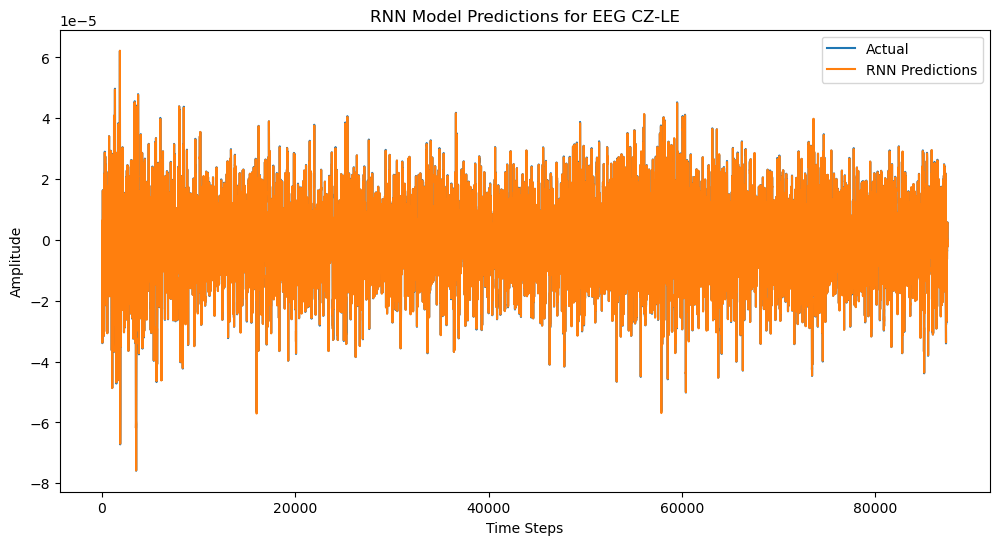

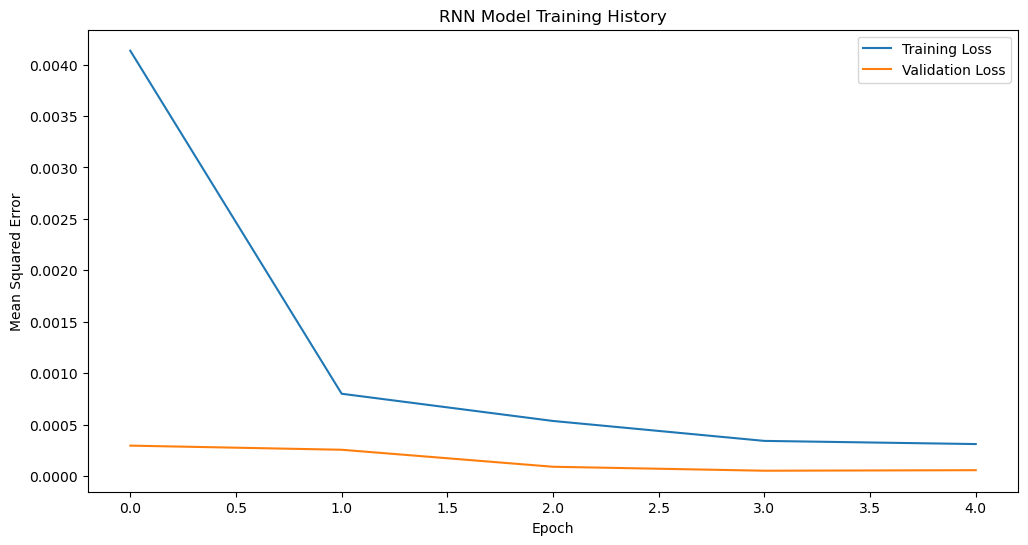

In [14]:
# Recurrent Neural Network (RNN) Model
# Prepare data for RNN
seq_length = 50  # Number of time steps to look back
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Normalize the data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std
y_train = (y_train - mean) / std
y_test = (y_test - mean) / std

# Reshape input data for RNN [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=5, 
                    batch_size=32, validation_split=0.1, verbose=1)

# Make predictions
rnn_predictions = model.predict(X_test)

# Denormalize predictions and actual values
rnn_predictions = (rnn_predictions * std) + mean
y_test = (y_test * std) + mean

# Evaluate RNN model
rnn_mse = np.mean((y_test - rnn_predictions.flatten())**2)
print(f"RNN Model MSE: {rnn_mse}")

# Plot RNN results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(rnn_predictions, label='RNN Predictions')
plt.legend()
plt.title(f'RNN Model Predictions for {channel_name}')
plt.xlabel('Time Steps')
plt.ylabel('Amplitude')
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('RNN Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()

In [14]:
save_rnn_model(model, '../models/rnn_model.keras')

RNN model saved successfully to ../models/rnn_model.keras


In [17]:
model = load_rnn_model('../models/rnn_model.keras')

RNN model loaded successfully from ../models/rnn_model.keras


In [15]:
# Make predictions using the trained RNN model
rnn_predictions = model.predict(X_test)

# Denormalize predictions and actual values
rnn_predictions = (rnn_predictions * std) + mean
y_test = (y_test * std) + mean

# Evaluate RNN model
rnn_mse = np.mean((y_test - rnn_predictions.flatten())**2)
print(f"RNN Model MSE: {rnn_mse}")

# Visualization parameters
sampling_rate = 250  # Hz
duration = 3  # seconds
num_samples = duration * sampling_rate

# Create time array for 3 seconds
time = np.arange(num_samples) / sampling_rate

# Select a 3-second slice of data
start_index = 0  # You can change this to start at a different point
true_slice = y_test[start_index:start_index+num_samples]
pred_slice = rnn_predictions[start_index:start_index+num_samples].flatten()

2733/2733 ━━━━━━━━━━━━━━━━━━━━ 3s 994us/step
RNN Model MSE: 1.5052914144123423e-10


In [16]:
# Denorm pred's
def scale_to_range(data, target_min, target_max):
    data_min, data_max = np.min(data), np.max(data)
    return ((data - data_min) / (data_max - data_min)) * (target_max - target_min) + target_min

# Visualization parameters
sampling_rate = 250  # Hz
duration = 3  # seconds
num_samples = duration * sampling_rate

# Create time array for 3 seconds
time = np.arange(num_samples) / sampling_rate

# Select a 3-second slice of data
start_index = 0  # You can change this to start at a different point
true_slice = y_test[start_index:start_index+num_samples]
pred_slice = rnn_predictions[start_index:start_index+num_samples]

# Ensure both slices are 1D arrays
true_slice = true_slice.flatten()
pred_slice = pred_slice.flatten()

# Make sure both slices have the same length
min_length = min(len(true_slice), len(pred_slice))
true_slice = true_slice[:min_length]
pred_slice = pred_slice[:min_length]

# Scale true data to match the range of predicted data
pred_min, pred_max = np.min(pred_slice), np.max(pred_slice)
true_slice_scaled = scale_to_range(true_slice, pred_min, pred_max)

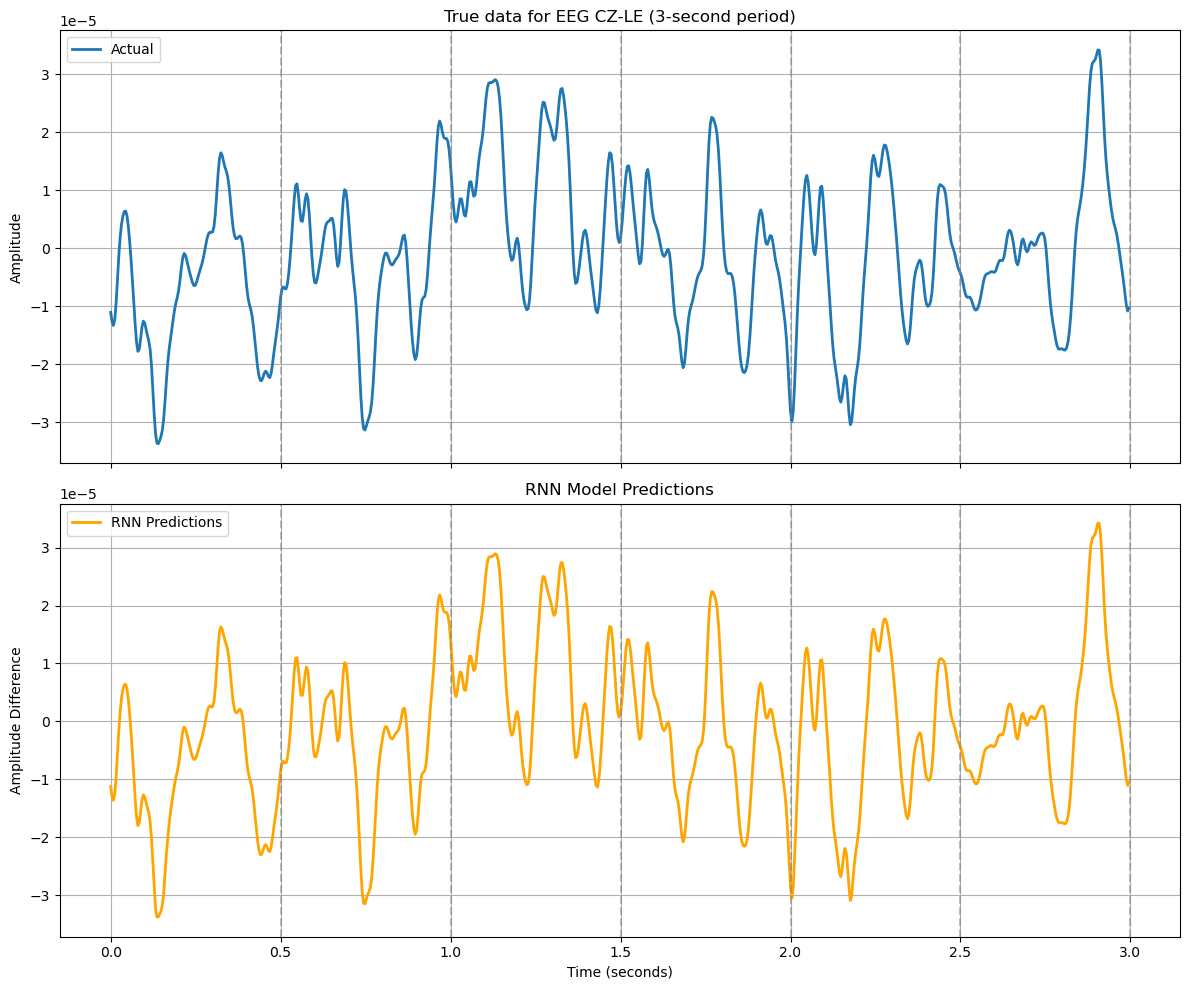

In [20]:
# Visualization parameters
sampling_rate = 250  # Hz
duration = 3  # seconds
num_samples = duration * sampling_rate

# Create time array for 3 seconds
time = np.arange(num_samples) / sampling_rate

# Create subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot actual and predicted data
ax1.plot(time, true_slice_scaled, label='Actual', linewidth=2)
ax1.set_ylabel('Amplitude')
ax1.set_title('True data for EEG CZ-LE (3-second period)')
ax1.legend()
ax1.grid(True)

# Plot the difference between actual and predicted data
ax2.plot(time, pred_slice, label='RNN Predictions', linewidth=2, #alpha=0.7,
         color='Orange')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Amplitude Difference')
ax2.set_title('RNN Model Predictions')
ax2.legend()
ax2.grid(True)

# Add vertical lines every 0.5 seconds for better readability
for ax in [ax1, ax2]:
    for t in np.arange(0.5, 3.5, 0.5):
        ax.axvline(x=t, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
